# Project 4A: West Nile Virus presence analysis

## Problem Statement

Around the continental United States (US), the West Nile virus (WNV) is the leading mosquito-borne disease. Between 1999 to 2019, the yearly average number of WNV cases identified was around 2,500, with an average mortality rate of 5% [[1]](https://www.cdc.gov/westnile/statsmaps/cumMapsData.html).
As data scientists for the Chicago Department of Public Health (CDPH), we are seeking to create a classification model that predicts whether WNV will be present for a particular species of mosquito given the weather and location. This analysis is for the purpose of allocating CDPH resources more efficiently and effectively to combat and prevent the transmission of the WNV.
The team will explore the use of logistic regression, k-nearest neighbours, and random forest for the prediction of WNV in the mosquito populations.
As we are seeking to reduce the transmission of the disease, the model's success will be evaluated based on its F1 score, as we are looking to balance the number of false negatives and positives in order to make sure no resources are wasted while also ensuring that no clusters are missed out.

### Overall Contents:
- [Background](#1.-Background) **(In this notebook)**
- [Data Cleaning](#2.-Data-Cleaning) **(In this notebook)**
- Exploratory Data Analysis
- Modeling 1 Logistic Regression
- Modeling 2 k-Nearest Neighbours
- Modeling 3 Random Forest
- Evaluation
- Conclusion and Recommendation

## 1. Background

West Nile Virus(WNV) is a mosquito borne arbovirus that was first introduced in United States in 1999. It has became the most common virus transmitted by mosquitos (mainly *Culex* species) from infected bird to human in the U.S. with a mortality rate of 5% of reported cases[[1]](https://www.cdc.gov/westnile/statsmaps/cumMapsData.html)[[2]](https://us.biogents.com/house-mosquitoes/). Around 80% of the infected people does not display any symptoms while the 20% who are infected will develop West nile fever or lead to severe disease which are neuroinvasive disease [[3]](https://www.who.int/news-room/fact-sheets/detail/west-nile-virus). There are currently no vaccine available for humans and treatment is supportive for patients who developed neuroinvasive disease[[3]](https://www.who.int/news-room/fact-sheets/detail/west-nile-virus). Thus, the ways to reduce this spread is to raise awareness of prevention measures, implement mosquito surveillance and control programs in at-risk areas. [[4]](https://www.vdci.net/vector-borne-diseases/west-nile-virus-education-and-mosquito-management-to-protect-public-health/)

In Chicago, the first human case with wnv virus was reported in 2002 with 22 fatalities [[5]](https://www.chicago.gov/dam/city/depts/cdph/comm_dis/general/Communicable_Disease/CD_CDInfo_Jun07_WNV.pdf). As a preventive measure of this WNV outbreak, Chicago Department for Public Health (CDPH) has set up a surveillance and control program that includes annual spraying in 2004.[[6]](https://www.govtech.com/analytics/chicago-turns-to-predictive-analytics-to-map-west-nile-threat.html). In order to spray areas having WNV-carrying mosquitoes, a predictive model is required. As data scientists for CDPH, we are seeking to create a classification model that predicts whether WNV will be present for a particular species of mosquito given the weather and location. The team will explore the use of logistic regression, k-nearest neighbours, and random forest for the prediction of WNV in the mosquito populations. As we are seeking to reduce the transmission of the disease and allocating CDPH resources more efficiently and effectively, the model's success will be evaluated based on its F1 score. This will allow us to balance the number of false negatives and positives in order to make sure no resources are wasted while also ensuring that no clusters are missed out.

### 1.1 Datasets

The dataset contains the weather, location, testing and spraying in the City of Chicago.The data source below are obtained from [kaggle](https://www.kaggle.com/c/predict-west-nile-virus/data).

The datasets obtained are as followed:-

* train_df (2007, 2009, 2011, 2013)
* spray_df (2011 to 2013)
* weather_df (2007 to 2014)
* test_df (2008, 2010, 2012, 2014)

## 2. Data Cleaning

### 2.1 Libraries Import

In [1]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Maximum display of columns
pd.options.display.max_colwidth = 400
pd.options.display.max_rows = 400

### 2.2 Data Import

In [2]:
# Import data of train, weather, spray and test from csv
train_df = pd.read_csv('../assets/train.csv')
weather_df = pd.read_csv("../assets/weather.csv")
spray_df = pd.read_csv('../assets/spray.csv')
test_df = pd.read_csv("../assets/test.csv")
mapdata = np.loadtxt("../assets/mapdata_copyright_openstreetmap_contributors.txt")

### 2.3 Data Cleaning

### 2.3.1 Overview

In [3]:
# Header of train_data
train_df.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [4]:
# Header of weather data
weather_df.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [5]:
# Header of spray data
spray_df.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [6]:
# Header of test data
test_df.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


### 2.3.2 Change column names and values to lower case and drop columns

#### 2.3.2.1 Columns names

In [7]:
# To change the column names for train, weather, spray and test
train_df.columns = train_df.columns.str.lower()
weather_df.columns = weather_df.columns.str.lower()
spray_df.columns = spray_df.columns.str.lower()
test_df.columns = test_df.columns.str.lower()

#### 2.3.2.2 Columns values

For train_df and test_df, the address, species, street and addressnumberandstreet will be changed to lower case.

In [8]:
# Train_df
train_df.species = train_df.species.str.lower()
train_df.addressnumberandstreet = train_df.addressnumberandstreet.str.lower()

In [9]:
# Test_df
test_df.species = test_df.species.str.lower()
test_df.addressnumberandstreet = test_df.addressnumberandstreet.str.lower()

#### 2.3.2.3 Drop Columns

In [10]:
# # Train_df drop 'address','block','street','trap', 'addressaccuracy'
train_df = train_df.drop(['address','block','street','addressaccuracy'], axis = 1)

In [11]:
# # Test_df drop 'address','block','street','trap', 'addressaccuracy'
test_df = test_df.drop(['id','address','block','street','addressaccuracy'], axis = 1)

### 2.3.3 Check for dtypes and missing values

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    10506 non-null  object 
 1   species                 10506 non-null  object 
 2   trap                    10506 non-null  object 
 3   addressnumberandstreet  10506 non-null  object 
 4   latitude                10506 non-null  float64
 5   longitude               10506 non-null  float64
 6   nummosquitos            10506 non-null  int64  
 7   wnvpresent              10506 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 656.8+ KB


**Analysis: train_data has no missing values with date dtype will be changed to datetime dtype in exploratory data analysis section.**

In [13]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   station      2944 non-null   int64  
 1   date         2944 non-null   object 
 2   tmax         2944 non-null   int64  
 3   tmin         2944 non-null   int64  
 4   tavg         2944 non-null   object 
 5   depart       2944 non-null   object 
 6   dewpoint     2944 non-null   int64  
 7   wetbulb      2944 non-null   object 
 8   heat         2944 non-null   object 
 9   cool         2944 non-null   object 
 10  sunrise      2944 non-null   object 
 11  sunset       2944 non-null   object 
 12  codesum      2944 non-null   object 
 13  depth        2944 non-null   object 
 14  water1       2944 non-null   object 
 15  snowfall     2944 non-null   object 
 16  preciptotal  2944 non-null   object 
 17  stnpressure  2944 non-null   object 
 18  sealevel     2944 non-null   object 
 19  result

In [14]:
# To check the missing values indicated as 'M'
weather_df[weather_df == 'M'].count()[weather_df[weather_df == 'M'].count()>0].sort_values(ascending = False)

water1         2944
snowfall       1472
depth          1472
depart         1472
cool             11
heat             11
tavg             11
sealevel          9
stnpressure       4
wetbulb           4
avgspeed          3
preciptotal       2
dtype: int64

In [15]:
# To check the missing values indicated as '-'
weather_df[weather_df == '-'].count()[weather_df[weather_df == '-'].count()>0]

sunrise    1472
sunset     1472
dtype: int64

**Analysis: weather_data has missing values denoted as 'M' or '-' and there are 14 columns with missing values. The data dtype will be converted to the int/float when handling the missing data. The date dtype will be changed to datetime dtype in exploratory data analysis section.**

In [16]:
spray_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       14835 non-null  object 
 1   time       14251 non-null  object 
 2   latitude   14835 non-null  float64
 3   longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


**Analysis: time has missing values. The date dtype will be changed to datetime dtype in exploratory data analysis section.**

In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   date                    116293 non-null  object 
 1   species                 116293 non-null  object 
 2   trap                    116293 non-null  object 
 3   addressnumberandstreet  116293 non-null  object 
 4   latitude                116293 non-null  float64
 5   longitude               116293 non-null  float64
dtypes: float64(2), object(4)
memory usage: 5.3+ MB


**Analysis: test_df has no missing values with date dtype will be changed to datetime dtype in exploratory data analysis section.**

### 2.3.4 Missing values and dtypes of weather_df

### 2.3.4.1 tavg

Average temperature is the average of maximum (tmax) and minimum (tmin) temperature.

In [18]:
# To check the missing values of tavg
weather_df[weather_df.tavg == 'M'].head()

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
7,2,2007-05-04,78,51,M,M,42,50,M,M,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
505,2,2008-07-08,86,46,M,M,68,71,M,M,...,TS RA,M,M,M,0.28,29.16,29.80,7.4,24,8.3
675,2,2008-10-01,62,46,M,M,41,47,M,M,...,,M,M,M,0.00,29.30,29.96,10.9,33,11.0
1637,2,2011-07-22,100,71,M,M,70,74,M,M,...,TS TSRA BR,M,M,M,0.14,29.23,29.86,3.8,10,8.2
2067,2,2012-08-22,84,72,M,M,51,61,M,M,...,,M,M,M,0.00,29.39,M,4.7,19,M


In [19]:
# To calculate the average of tmax and tmin for tavg
for index, average in enumerate (weather_df.tavg):
    if average == 'M':
        weather_df.loc[[index], ["tavg"]] = np.ceil((weather_df.tmax[index] + weather_df.tmin[index])/2)

In [20]:
# To check the calculated tavg of the missing values
weather_df.loc[[7, 505, 675, 1637, 2067, 2211, 2501, 2511, 2525, 2579, 2811], ["tmax", 'tmin', 'tavg']]

,tmax,tmin,tavg
7,78,51,65
505,86,46,66
675,62,46,54
1637,100,71,86
2067,84,72,78
2211,71,42,57
2501,91,52,72
2511,84,53,69
2525,76,48,62
2579,80,47,64


In [21]:
# Convert tavg dtype to int
weather_df.tavg = weather_df.tavg.astype(int)
print(f"The dtype of tavg is : {weather_df.tavg.dtype}.")

The dtype of tavg is : int32.


### 2.3.4.2 heat and cool

The degree days: base is 65&deg;F. 
- If the temperature average is above 65&deg;F, subtract 65&deg;F from the mean and it is cool.
- If the temperature average is below 65&deg;F, subtract mean from 65&deg;F and it is heat. [[7]](https://www.weather.gov/key/climate_heat_cool#:~:text=If%20the%20temperature%20mean%20is,result%20is%20Heating%20Degree%20Days.&text=Because%20the%20result%20is%20below,F%20%3D%2036%20Heating%20Degree%20Days.)

In [22]:
# Check the missing values in heat and cool
weather_df[(weather_df.heat == 'M') & (weather_df.cool == 'M')].head()

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
7,2,2007-05-04,78,51,65,M,42,50,M,M,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
505,2,2008-07-08,86,46,66,M,68,71,M,M,...,TS RA,M,M,M,0.28,29.16,29.80,7.4,24,8.3
675,2,2008-10-01,62,46,54,M,41,47,M,M,...,,M,M,M,0.00,29.30,29.96,10.9,33,11.0
1637,2,2011-07-22,100,71,86,M,70,74,M,M,...,TS TSRA BR,M,M,M,0.14,29.23,29.86,3.8,10,8.2
2067,2,2012-08-22,84,72,78,M,51,61,M,M,...,,M,M,M,0.00,29.39,M,4.7,19,M


In [23]:
# To calculate the heat and cool using tavg
for index, item in enumerate(weather_df.tavg):
    if (weather_df.heat[index] == 'M') & (weather_df.cool[index] == 'M'):
        if item>= 65:
            difference_cool = weather_df.tavg[index] - 65
            weather_df.loc[[index], ["cool"]] = difference_cool
            weather_df.loc[[index], ['heat']] = 0
        else:
            difference_heat = 65 - weather_df.tavg[index]
            weather_df.loc[[index], ["cool"]] = 0
            weather_df.loc[[index], ['heat']] = difference_heat

In [24]:
# To check the values for missing values
weather_df.loc[[7, 505, 675, 1637, 2067, 2211, 2501, 2511, 2525, 2579, 2811], ["tavg", 'heat', 'cool']]

,tavg,heat,cool
7,65,0,0
505,66,0,1
675,54,11,0
1637,86,0,21
2067,78,0,13
2211,57,8,0
2501,72,0,7
2511,69,0,4
2525,62,3,0
2579,64,1,0


In [25]:
# Convert heat and cool dtype to int
weather_df.heat = weather_df.heat.astype(int)
weather_df.cool = weather_df.cool.astype(int)
print(f"The dtype of heat is : {weather_df.heat.dtype}.")
print(f"The dtype of cool is : {weather_df.cool.dtype}.")

The dtype of heat is : int32.
The dtype of cool is : int32.


### 2.3.4.3 water1

In [26]:
print(f" The missing data in water1 column is {weather_df.water1.isnull().count()}")
print(f" The number of weather_data rows is {weather_df.shape[0]}")

 The missing data in water1 column is 2944
 The number of weather_data rows is 2944


**Analysis: water1 column has no information (all missing data). Thus, this column will be removed.**

In [27]:
weather_df = weather_df.drop("water1", axis = 1)
weather_df.columns

Index(['station', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'depth',
       'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed',
       'resultdir', 'avgspeed'],
      dtype='object')

**Analysis: water1 column have been removed and is not present in the weather_df.**

### 2.3.4.4 depart

In [28]:
# Missing data in station 1
weather_df[(weather_df.station == 1) & (weather_df.depart == 'M')][["depart", "depth", "snowfall", "sunset", "sunrise"]].count()

depart      0
depth       0
snowfall    0
sunset      0
sunrise     0
dtype: int64

In [29]:
# Missing data in station 2
weather_df[(weather_df.station == 2) & (weather_df.depart == 'M')][["depart", "depth", "snowfall", "sunset", "sunrise"]].count()

depart      1472
depth       1472
snowfall    1472
sunset      1472
sunrise     1472
dtype: int64

**Analysis: Depart,depth, snowfall, sunset and sunrise columns will be removed. The missing data for these columns lie in station 2.**
* **Depart**

station 2 has no information on column depart. As depart means departure from normal, which is the difference between average temperature and the 30 year normal temperature for this date. As depart column will not be used in our analysis, we will be removed this column.


* **Depth**

Depth column has missing data or zero. Thus, this column will be removed.

* **Snowfall, sunset and sunrise**

As snowfall, sunset and sunrise columns will not be used in our analysis, we will be removed this column.

In [30]:
# Drop depart, depth, snowfall, sunset, sunrise
weather_df = weather_df.drop(["depart", "depth", "snowfall", "sunset", "sunrise"], axis = 1)

In [31]:
weather_df.columns

Index(['station', 'date', 'tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb',
       'heat', 'cool', 'codesum', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed'],
      dtype='object')

**Analysis: Depart,depth, snowfall, sunset and sunrise columns have been removed and are not present in the weather_df.**

### 2.3.4.5 sealevel, stnpressure, wetbulb, avgspeed, preciptotal

In [32]:
# To check the missing values
weather_df[weather_df == 'M'].count()[["sealevel", "stnpressure", "wetbulb", "avgspeed", 'preciptotal']]

sealevel       9
stnpressure    4
wetbulb        4
avgspeed       3
preciptotal    2
dtype: int64

**Analysis: As these values are missing data, these values will be dropped.**

In [33]:
# Drop the rows with missing values
weather_df = weather_df[weather_df.sealevel != 'M']
weather_df = weather_df[weather_df.stnpressure != 'M']
weather_df = weather_df[weather_df.wetbulb != 'M']
weather_df = weather_df[weather_df.avgspeed != 'M']
weather_df = weather_df[weather_df.preciptotal != 'M']

In [34]:
# To check the presence of missing values
weather_df[weather_df == 'M'].count()[["sealevel", "stnpressure", "wetbulb", "avgspeed", 'preciptotal']]

sealevel       0
stnpressure    0
wetbulb        0
avgspeed       0
preciptotal    0
dtype: int64

**Analysis: The values have been removed and there is no missing values for sealevel, stnpressure, wetbulb, avgspeed, and preciptotal. The values will be converted into dtype float/int in the next section.**

### 2.3.4.6 Change the trace value in preciptotal to integer

In [35]:
# To check the trace value in preciptotal
weather_df.preciptotal.unique()

array(['0.00', '  T', '0.13', '0.02', '0.38', '0.60', '0.14', '0.07',
       '0.11', '0.09', '1.01', '0.28', '0.04', '0.08', '0.01', '0.53',
       '0.19', '0.21', '0.32', '0.39', '0.31', '0.42', '0.27', '0.16',
       '0.58', '0.93', '0.05', '0.34', '0.15', '0.35', '0.40', '0.66',
       '0.30', '0.24', '0.43', '1.55', '0.92', '0.89', '0.17', '0.03',
       '1.43', '0.97', '0.26', '1.31', '0.06', '0.46', '0.29', '0.23',
       '0.41', '0.45', '0.83', '1.33', '0.91', '0.48', '0.37', '0.88',
       '2.35', '1.96', '0.20', '0.25', '0.18', '0.67', '0.36', '0.33',
       '1.28', '0.74', '0.76', '0.71', '0.95', '1.46', '0.12', '0.52',
       '0.64', '0.22', '1.24', '0.72', '0.73', '0.65', '1.61', '1.22',
       '0.50', '1.05', '2.43', '0.59', '2.90', '2.68', '1.23', '0.62',
       '6.64', '3.07', '1.44', '1.75', '0.82', '0.80', '0.86', '0.63',
       '0.55', '1.03', '0.70', '1.73', '1.38', '0.44', '1.14', '1.07',
       '3.97', '0.87', '0.78', '1.12', '0.68', '0.10', '0.61', '0.54',
       

**Analysis: The trace value will be changed to zero 0.00**

As the trace value is between 0.00 to 0.01, thus we will place the trace value as "0.00'. The values will be converted to dtype float.

In [36]:
# To replace the trace value ("  T") as 0.00
weather_df.preciptotal = weather_df.preciptotal.replace('  T', "0.00")

In [37]:
# Convert sealevel, stnpressure, wetbulb, avgspeed, preciptotal dtype to int
weather_df.sealevel = weather_df.sealevel.astype(float)
weather_df.stnpressure = weather_df.stnpressure.astype(float)
weather_df.wetbulb = weather_df.wetbulb.astype(int)
weather_df.avgspeed = weather_df.avgspeed.astype(float)
weather_df.preciptotal = weather_df.preciptotal.astype(float)
print(f"The dtype of sealevel is : {weather_df.sealevel.dtype}.")
print(f"The dtype of stnpressure is : {weather_df.stnpressure.dtype}.")
print(f"The dtype of wetbulb is : {weather_df.wetbulb.dtype}.")
print(f"The dtype of avgspeed is : {weather_df.avgspeed.dtype}.")
print(f"The dtype of preciptotal is : {weather_df.preciptotal.dtype}.")

The dtype of sealevel is : float64.
The dtype of stnpressure is : float64.
The dtype of wetbulb is : int32.
The dtype of avgspeed is : float64.
The dtype of preciptotal is : float64.


**Analysis: The dtype for sealevel, stnpressure, wetbulb, avgspeed and preciptotal columns has been converted to float/int.**

### 2.3.4.7 To verify the presence of missing values and dtypes

In [38]:
# To verify the presence of missing values and dtypes
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2943
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   station      2928 non-null   int64  
 1   date         2928 non-null   object 
 2   tmax         2928 non-null   int64  
 3   tmin         2928 non-null   int64  
 4   tavg         2928 non-null   int32  
 5   dewpoint     2928 non-null   int64  
 6   wetbulb      2928 non-null   int32  
 7   heat         2928 non-null   int32  
 8   cool         2928 non-null   int32  
 9   codesum      2928 non-null   object 
 10  preciptotal  2928 non-null   float64
 11  stnpressure  2928 non-null   float64
 12  sealevel     2928 non-null   float64
 13  resultspeed  2928 non-null   float64
 14  resultdir    2928 non-null   int64  
 15  avgspeed     2928 non-null   float64
dtypes: float64(5), int32(4), int64(5), object(2)
memory usage: 343.1+ KB


**Analysis: There are no missing values and the dtype for each numerical column has been converted. The date dtype will be converted to datatime in exploratory data analysis section.**

### 2.3.5 Missing values and dtypes of spray_df

### 2.3.5.1 Missing values in time column

In [39]:
# The different dates present in spray_df
spray_df.date.unique()

array(['2011-08-29', '2011-09-07', '2013-07-17', '2013-07-25',
       '2013-08-08', '2013-08-15', '2013-08-16', '2013-08-22',
       '2013-08-29', '2013-09-05'], dtype=object)

In [40]:
# Missing values in spray_df falls on 2011-09-07
spray_df[spray_df.time.isnull()].date.unique()

array(['2011-09-07'], dtype=object)

**Analysis: Missing values only fall on 2011-09-07. As time column will not be used for analysis, this column will be removed.**

In [41]:
# Drop the time column
spray_df = spray_df.drop('time', axis = 1)
spray_df.columns

Index(['date', 'latitude', 'longitude'], dtype='object')

**Analysis: The time column has been removed.**

### 2.3.5.2 Spray locations in spray_df 

To verify the spray locations are within the range of traps locations.
Any spray locations that are not within the range will be considered outliers and be removed.

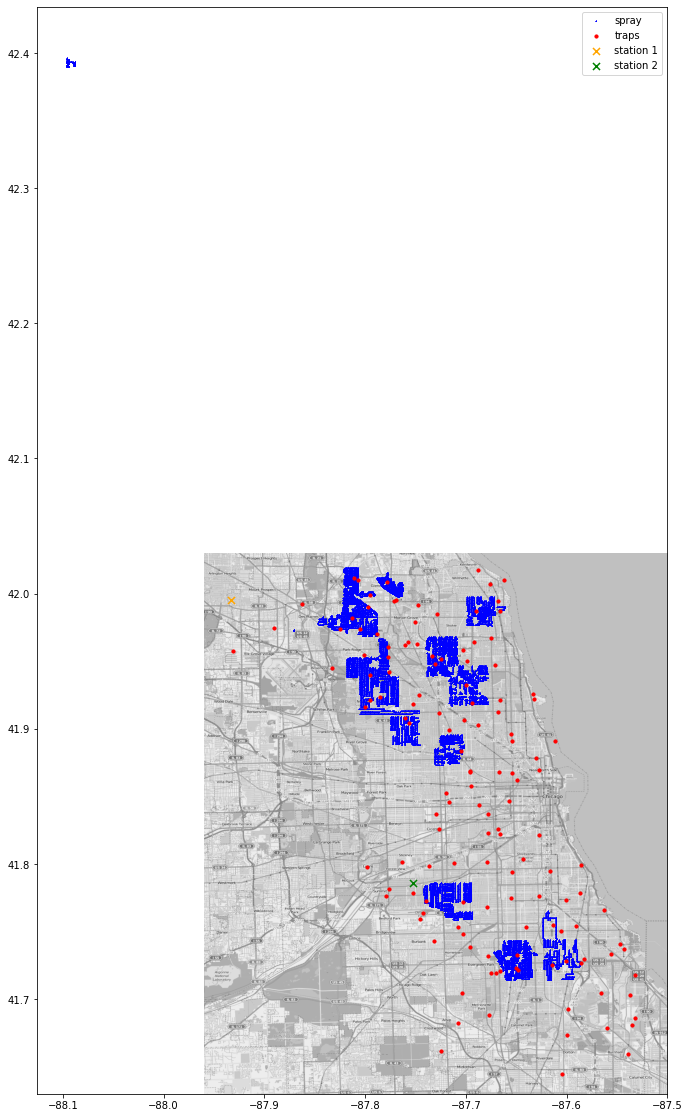

In [42]:
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-87.96, -87.5, 41.63, 42.03)

plt.figure(figsize=(15,20))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

spray_locs = spray_df[['longitude', 'latitude']].drop_duplicates().values
trap_locs = train_df[['longitude', 'latitude']].drop_duplicates().values

plt.scatter(spray_locs[:,0], spray_locs[:,1], marker='+', c='b',s=1, label = 'spray')
plt.scatter(trap_locs[:,0], trap_locs[:,1], marker='o', c='r',s=10, label = 'traps')
plt.scatter([-87.933], [41.995], marker='x', c='orange', s = 50, label = 'station 1')
plt.scatter([-87.752], [41.786], marker='x', c='g', s = 50, label = 'station 2')
plt.legend(loc='upper right')
plt.savefig('../imgs/map1.png')
plt.show()

**Analysis: There are spray locations which are very far away from the traps and the other spray locations. These will be considered outliers and removed.**

In [43]:
# Drop spray outliers in spray_df
spray_df.drop(index=spray_df[spray_df.latitude > 42.1].index, inplace=True)

In [44]:
# To verify the removal of outliers that lies beyond latitude > 42.1
spray_df.describe()

,latitude,longitude
count,14740.000000,14740.000000
mean,41.901686,-87.734391
std,0.097077,0.061091
min,41.713925,-87.871023
25%,41.784533,-87.794148
50%,41.939643,-87.727195
75%,41.980335,-87.693871
max,42.018907,-87.586727


**Analysis: The maximum latitude in spray_df is less than 42.1. The outliers in spray_df has been removed.**

#### 2.3.4.2.3 To verify the presence of missing values and dtypes

In [45]:
# To verify the missing values and dtypes
spray_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14740 entries, 95 to 14834
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       14740 non-null  object 
 1   latitude   14740 non-null  float64
 2   longitude  14740 non-null  float64
dtypes: float64(2), object(1)
memory usage: 460.6+ KB


**Analysis: There are no missing values. The date dtype will be converted to datatime in exploratory data analysis section.**

## 2.4. Summary

**Summary**

**For train_df, test_df, weather_df and spray_df:**
* The column names have been changed to lower case.
* The date dtype will be converted to datetime in exploratory data analysis section.

**For train_df and test_df:**
* There are no missing values. The selected columns have been dropped and the column values have been changed to lower case.

**For weather_df:**
* The missing values are indicated as 'M' and '-'.
* The missing values in tavg, heat and cool columns have been calculated.
* The water1, depart, depth, snowfall, sunset, sunrise columns have been removed as majority has missing values or these columns will not be used in our analysis.
* The missing values in sealevel, stnpressure, wetbulb, avgspeed and preciptotal have been removed.
* The trace value in preciptotal in has been converted to 0.00.
* The numerical columns have been converted to int/float dtype.

**For spray_df:**
* The time column will not be used in our analysis and has been removed.
* There are spray locations that are beyond the trap locations and have been removed.

## Exporting Data

In [49]:
# # Placed the # to refrain from executing
#train_df.to_csv("../data/train_df_clean.csv", index = False)
#test_df.to_csv("../data/test_df_clean.csv", index = False)
#weather_df.to_csv("../data/weather_df_clean.csv", index = False)
#spray_df.to_csv("../data/spray_df_clean.csv", index = False)

## References

[1] "West Nile virus disease cases reported to CDC by state of residence, 1999-2019," *Centers for Disease Control and Prevention*, November 24, 2020. [Online]. Available: [https://www.cdc.gov/westnile/statsmaps/cumMapsData.html](https://www.cdc.gov/westnile/statsmaps/cumMapsData.html) [Accessed: May. 6, 2021].

[2] "House Mosquitoes," *Biogents USA*. [Online]. Available: [https://us.biogents.com/house-mosquitoes/](https://us.biogents.com/house-mosquitoes/) [Accessed: May. 6, 2021].

[3] "West Nile Virus," *World Health Organization*, October 03, 2017. [Online]. Available: [https://www.who.int/news-room/fact-sheets/detail/west-nile-virus](https://www.who.int/news-room/fact-sheets/detail/west-nile-virus) [Accessed: May 6, 2021].

[4] "What is West Nile Virus and How Does it Spread?," *VDCI A Rentokil Company*, 2021. [Online]. Available: [https://www.vdci.net/vector-borne-diseases/west-nile-virus-education-and-mosquito-management-to-protect-public-health/](https://www.vdci.net/vector-borne-diseases/west-nile-virus-education-and-mosquito-management-to-protect-public-health/) [Accessed: May 6, 2021].

[5] "West Nile Virus," *Chicago Department of Public Health Communication Disease Information*, June, 2007. [Online]. Available: [https://www.chicago.gov/dam/city/depts/cdph/comm_dis/general/Communicable_Disease/CD_CDInfo_Jun07_WNV.pdf](https://www.chicago.gov/dam/city/depts/cdph/comm_dis/general/Communicable_Disease/CD_CDInfo_Jun07_WNV.pdf) [Accessed: May 6, 2021].

[6] S. Thornton, "Chicago Turns to Predictive Analytics to Map West Nile Threat," *Government Technology*, October 25, 2017. [Online].[https://www.govtech.com/analytics/chicago-turns-to-predictive-analytics-to-map-west-nile-threat.html](https://www.govtech.com/analytics/chicago-turns-to-predictive-analytics-to-map-west-nile-threat.html) [Accessed: May 6, 2021].

[7] "What are Heating and Cooling Degree Days," *National Weather Service*. [Online]. Available: [https://www.weather.gov/key/climate_heat_cool#:~:text=If%20the%20temperature%20mean%20is,result%20is%20Heating%20Degree%20Days.&text=Because%20the%20result%20is%20below,F%20%3D%2036%20Heating%20Degree%20Days.](https://www.weather.gov/key/climate_heat_cool#:~:text=If%20the%20temperature%20mean%20is,result%20is%20Heating%20Degree%20Days.&text=Because%20the%20result%20is%20below,F%20%3D%2036%20Heating%20Degree%20Days) [Accessed: May. 1, 2021].